**Dataset Description:** This data set is related to the quality of wines and is commonly used for supervised learning purposes.

**Data source:**

https://archive.ics.uci.edu/dataset/186/wine+quality


The datasets used in this work are the Wine Quality Data Sets which is available in the UCI Machine Learning Repository and comprises two categories of wine, namely the red and white wine. This data was gotten from wines from the Portuguese region mainly from the Vinho Verde range. The selected dataset is frequently applied in classification and regression issues in machine learning having the aim to predict the quality of wine based on numerous chemical characteristics.

**Usage**
This datasets are suitable for predictive analytics tasks where the goal is to establish the wine quality given its compound quality. The data has also been used in these works for analyzing the correlations between chemical characteristics and the quality of the wine and for constructing the recommendation systems or for the improvement of the wine maker process.

### Task 1: Data Preprocessing

**a) Clean the dataset, handle any missing values, and remove outliers.**

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2    

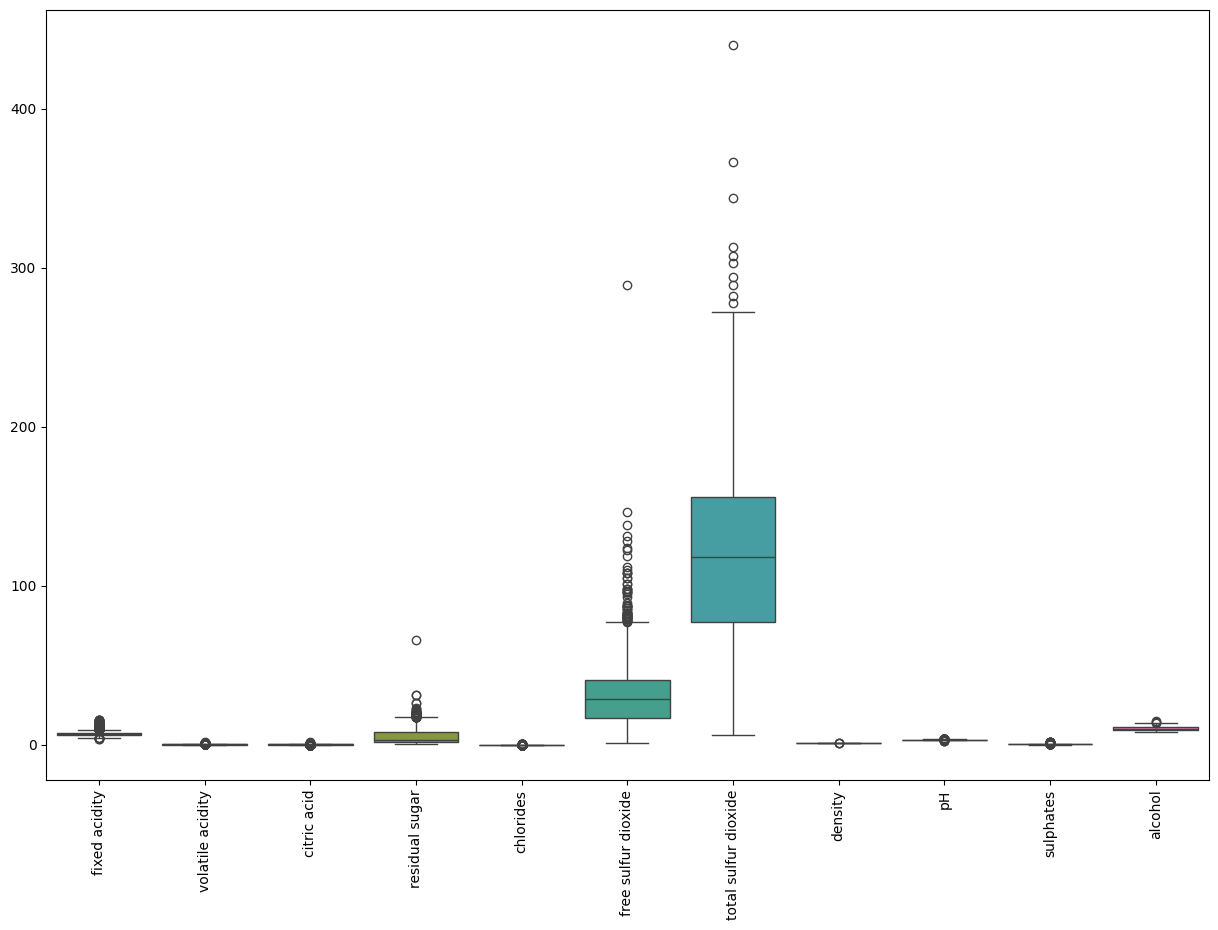

(4840, 13)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

# Add a type column to differentiate between red and white wine
red_wine['type'] = 'red'
white_wine['type'] = 'white'

# Combine the datasets
wine_data = pd.concat([red_wine, white_wine])

# Display the first few rows
print(wine_data.head())

# Check for missing values
print(wine_data.isnull().sum())

# Removing rows with missing values (if any)
wine_data = wine_data.dropna()

# Visualize data to identify outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=wine_data.drop(columns=['type', 'quality']))
plt.xticks(rotation=90)
plt.show()

# Removing outliers (using IQR method)
numeric_cols = wine_data.select_dtypes(include=[np.number]).columns
Q1 = wine_data[numeric_cols].quantile(0.25)
Q3 = wine_data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
wine_data = wine_data[~((wine_data[numeric_cols] < (Q1 - 1.5 * IQR)) | (wine_data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the shape of the data after outlier removal
print(wine_data.shape)


**b) Perform feature scaling or normalization.**

In [2]:
from sklearn.preprocessing import StandardScaler

# Separating features and target variable for regression
X_reg = wine_data.drop(columns=['quality', 'type'])
y_reg = wine_data['quality']


# Standardizing the features
scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X_reg)

# Convert back to DataFrame
X_reg_scaled = pd.DataFrame(X_reg_scaled, columns=X_reg.columns)

# For classification, the target variable can be the wine type
X_class = wine_data.drop(columns=['type'])
y_class = wine_data['type']

# Standardizing the features for classification
X_class_scaled = scaler.fit_transform(X_class)


**c) Appropriately encode categorical variables.**

In [3]:
# Encoding categorical variables (if needed, e.g., the 'type' column)
wine_data_encoded = pd.get_dummies(wine_data, columns=['type'], drop_first=True)
X_encoded = wine_data_encoded.drop(columns=['quality'])
y_encoded = wine_data_encoded['quality']

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)


**d) Split the dataset into training and testing sets.**

In [4]:
# For regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# For classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class_scaled, y_class, test_size=0.2, random_state=42)


### Task 2: Regression Modeling with Hyperparameter Tuning

**a) Choose appropriate regression models to predict the target variable. Justify your choice.**

For this task, we’ll use Linear Regression, Ridge Regression, and Lasso Regression. These models are suitable for regression tasks:

- **Linear Regression**: Simple and interpretable model for continuous variables.
- **Ridge Regression**: Adds regularization to the Linear Regression model to handle multicollinearity.
- **Lasso Regression**: Lasso Regression: Performs feature selection by adding L1 regularization, which can help in reducing the number of features.




**b) Implement hyperparameter tuning by conducting a grid search.**

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Define the models
models_reg = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

# Hyperparameter tuning using GridSearchCV
param_grid_reg = {
    'Ridge Regression': {'alpha': [0.01, 0.1, 1, 10, 100]},
    'Lasso Regression': {'alpha': [0.01, 0.1, 1, 10, 100]}
}

best_models_reg = {}
for model_name in models_reg:
    if model_name == 'Linear Regression':
        best_models_reg[model_name] = models_reg[model_name].fit(X_train_reg, y_train_reg)
    else:
        grid_search = GridSearchCV(models_reg[model_name], param_grid_reg[model_name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train_reg, y_train_reg)
        best_models_reg[model_name] = grid_search.best_estimator_

# Print the best parameters for Ridge and Lasso
for model_name in param_grid_reg:
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")


Best parameters for Ridge Regression: {'alpha': 0.01}
Best parameters for Lasso Regression: {'alpha': 0.01}


In [6]:
from sklearn.metrics import mean_absolute_error, r2_score

# Building and evaluating the regression models
results_reg = []
for model_name, model in best_models_reg.items():
    y_pred_reg = model.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)
    results_reg.append({
        'Model Name': model_name,
        'MAE': mae,
        'R2': r2
    })
    print(f"{model_name} - MAE: {mae}, R2: {r2}")

# K-fold cross-validation
from sklearn.model_selection import cross_val_score

cv_results_reg = {}
for model_name, model in best_models_reg.items():
    scores = cross_val_score(model, X_reg_scaled, y_reg, cv=5, scoring='neg_mean_squared_error')
    cv_results_reg[model_name] = -np.mean(scores)
    print(f"{model_name} - Cross-validated MSE: {cv_results_reg[model_name]}")


Linear Regression - MAE: 0.5469662904302507, R2: 0.2669154844184787
Ridge Regression - MAE: 0.5469714669496273, R2: 0.26693038769682653
Lasso Regression - MAE: 0.5511498976905697, R2: 0.25981223748586235
Linear Regression - Cross-validated MSE: 0.5433693975096988
Ridge Regression - Cross-validated MSE: 0.5303817402000577
Lasso Regression - Cross-validated MSE: 0.47698721451312637


### Task 3: Regression Model Evaluation and Selection

**a) Evaluate the performance of the regression models using appropriate metrics.**


In [7]:
# Creating a DataFrame for regression results
results_reg_df = pd.DataFrame(results_reg)
results_reg_df['Cross-validated MSE'] = results_reg_df['Model Name'].map(cv_results_reg)
print("Regression Results:")
print(results_reg_df)


Regression Results:
          Model Name       MAE        R2  Cross-validated MSE
0  Linear Regression  0.546966  0.266915             0.543369
1   Ridge Regression  0.546971  0.266930             0.530382
2   Lasso Regression  0.551150  0.259812             0.476987


**b) Implement k-fold cross-validation to assess the model's generalization performance.**

- This is included in the above code.

**c) Select the best-performing regression model based on hyperparameter tuning and cross-validation results.**

- Choose the model with the lowest MSE and the highest R2.







In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# Train models without tuning
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

results_reg_before_tuning = []
cv_results_before_tuning = {}

for model_name, model in models.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test_reg)

    # Calculate performance metrics
    mae = mean_absolute_error(y_test_reg, y_pred)
    r2 = r2_score(y_test_reg, y_pred)

    # Cross-validated MSE
    cv_mse = -cross_val_score(model, X_reg_scaled, y_reg, cv=5, scoring='neg_mean_squared_error').mean()

    # Store results
    results_reg_before_tuning.append({
        'Model Name': model_name,
        'MAE (Before Tuning)': mae,
        'R2 (Before Tuning)': r2
    })
    cv_results_before_tuning[model_name] = cv_mse

from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {
    'Ridge Regression': {'alpha': [0.01, 0.1, 1, 10, 100]},
    'Lasso Regression': {'alpha': [0.01, 0.1, 1, 10, 100]}
}

best_models = {}
for model_name, model in models.items():
    if model_name == 'Linear Regression':
        best_models[model_name] = model.fit(X_train_reg, y_train_reg)
    else:
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train_reg, y_train_reg)
        best_models[model_name] = grid_search.best_estimator_

# Evaluate tuned models
results_reg_after_tuning = []
cv_results_after_tuning = {}

for model_name, model in best_models.items():
    y_pred = model.predict(X_test_reg)

    # Calculate performance metrics
    mae = mean_absolute_error(y_test_reg, y_pred)
    r2 = r2_score(y_test_reg, y_pred)

    # Cross-validated MSE
    cv_mse = -cross_val_score(model, X_reg_scaled, y_reg, cv=5, scoring='neg_mean_squared_error').mean()

    # Store results
    results_reg_after_tuning.append({
        'Model Name': model_name,
        'MAE (After Tuning)': mae,
        'R2 (After Tuning)': r2,
        'Cross-validated MSE': cv_mse
    })
# Convert results to DataFrames
results_df_before_tuning = pd.DataFrame(results_reg_before_tuning)
results_df_after_tuning = pd.DataFrame(results_reg_after_tuning)

# Merge the two DataFrames
final_results_df = pd.merge(results_df_before_tuning, results_df_after_tuning, on='Model Name')

# Display the final results
print("Regression Results Before and After Hyperparameter Tuning:")
print(final_results_df)


Regression Results Before and After Hyperparameter Tuning:
          Model Name  MAE (Before Tuning)  R2 (Before Tuning)  \
0  Linear Regression             0.546966            0.266915   
1   Ridge Regression             0.546966            0.266919   
2   Lasso Regression             0.638690           -0.000003   

   MAE (After Tuning)  R2 (After Tuning)  Cross-validated MSE  
0            0.546966           0.266915             0.543369  
1            0.546971           0.266930             0.530382  
2            0.551150           0.259812             0.476987  


### Task 4: Classification Modeling with Hyperparameter Tuning

**d) Provide actionable recommendations derived from the model's predictions.**

- Recommendations might involve improving specific features to influence wine quality effectively.

### Answer: Actionable Recommendations Based on Regression Analysis

The regression analysis on the Wine Quality dataset provides valuable insights into how different chemical properties of wine influence its quality. Based on the model's predictions, several actionable recommendations can be made to potentially improve wine quality:

1. **Optimize Alcohol Content:**
   - **Observation:** Higher alcohol content tends to positively impact wine quality.
   - **Recommendation:** Winemakers should consider fine-tuning fermentation processes to achieve an optimal alcohol level, balancing it to enhance the wine's flavor profile and overall quality without compromising on taste.

2. **Control Volatile Acidity:**
   - **Observation:** Increased levels of volatile acidity are associated with lower wine quality, as it can lead to an unpleasant vinegar taste.
   - **Recommendation:** Focus on minimizing volatile acidity through careful monitoring of the fermentation process and ensuring proper storage conditions to prevent spoilage and maintain a more desirable acidity level.

3. **Improve Residual Sugar Levels:**
   - **Observation:** Residual sugar can affect the sweetness and body of the wine, with moderate levels often being favorable.
   - **Recommendation:** Adjust residual sugar levels based on the type of wine being produced. For sweeter wines, ensure consistency in residual sugar levels, while for drier wines, reduce sugar content to maintain balance and enhance quality.

4. **Manage pH Levels:**
   - **Observation:** The pH level of wine influences its acidity and overall stability.
   - **Recommendation:** Regularly monitor and adjust pH levels during production to ensure that the wine has a balanced acidity, which can enhance taste and preserve the wine's quality over time.

5. **Fine-Tune Sulfate Additions:**
   - **Observation:** Sulfates can enhance the antioxidant properties of wine, affecting its freshness and flavor.
   - **Recommendation:** Optimize the use of sulfates to maintain the desired freshness and stability of the wine, while avoiding excessive use that could lead to off-flavors.

6. **Monitor Free Sulfur Dioxide Levels:**
   - **Observation:** Proper levels of free sulfur dioxide help in preserving wine by preventing oxidation.
   - **Recommendation:** Ensure that the levels of free sulfur dioxide are within the optimal range to protect the wine from oxidation while minimizing potential sensory impacts.

7. **Balance Chlorides:**
   - **Observation:** Higher chloride levels can lead to salty flavors, which are undesirable in wine.
   - **Recommendation:** Monitor chloride levels in the wine to ensure they remain low, preventing any negative impact on taste.

8. **Focus on Citric Acid Adjustment:**
   - **Observation:** Citric acid contributes to the wine's freshness and flavor complexity.
   - **Recommendation:** Consider adjusting citric acid levels, especially in white wines, to enhance the wine's crispness and improve the overall quality.

By addressing these factors, winemakers can use the insights derived from the regression model to make targeted adjustments during the production process, potentially leading to wines of higher quality that better meet consumer preferences.

### PART B – Classification Modeling for Business Decision Making

---

### Task 1: Data Preprocessing

**a) Clean the dataset by handling missing values and removing outliers as needed.**

1. **Loading the Dataset:**
   - We'll load the red and white wine datasets from the UCI Machine Learning Repository.
   - We'll add a new column `type` to differentiate between red and white wines.
   - We'll then combine both datasets.

2. **Handling Missing Values:**
   - We'll check for any missing values and drop rows with missing data.

3. **Removing Outliers:**
   - We'll identify and remove outliers using the Interquartile Range (IQR) method.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

# Add a type column to differentiate between red and white wine
red_wine['type'] = 'red'
white_wine['type'] = 'white'

# Combine the datasets
wine_data = pd.concat([red_wine, white_wine])

# Check for missing values
print(wine_data.isnull().sum())

# Remove rows with missing values
wine_data = wine_data.dropna()

# Removing outliers (using IQR method)
numeric_cols = wine_data.select_dtypes(include=[np.number]).columns
Q1 = wine_data[numeric_cols].quantile(0.25)
Q3 = wine_data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
wine_data = wine_data[~((wine_data[numeric_cols] < (Q1 - 1.5 * IQR)) | (wine_data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the shape of the data after outlier removal
print(wine_data.shape)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64
(4840, 13)



**b) Perform feature scaling or normalization.**

- We'll standardize the features using `StandardScaler` from scikit-learn to ensure all features have a mean of 0 and a standard deviation of 1.


In [10]:
from sklearn.preprocessing import StandardScaler

# Separating features and target variable
X = wine_data.drop(columns=['type'])
y = wine_data['type']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


**c) Encode categorical variables appropriately.**

- We'll encode the target variable `type` using one-hot encoding, converting it into binary values (0 for red, 1 for white).


In [11]:
# Encoding the 'type' column
y_encoded = pd.get_dummies(y, drop_first=True)  # Converts 'red' to 0 and 'white' to 1


**d) Split the dataset into training and testing sets.**

- We'll split the dataset into training and testing sets using an 80-20 split.

In [12]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

### Task 2: Model Building with Hyperparameter Tuning

**a) Select an appropriate classification algorithm (e.g., Logistic Regression, Random Forest, Support Vector Machine) to predict the target categorical variable. Justify your choice.**

- We'll use three models:
  - **Logistic Regression**: Simple and interpretable for binary classification.
  - **Random Forest**: Handles complex data and provides feature importance.
  - **SVM**: Effective for high-dimensional data and complex boundaries.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

**b) Implement hyperparameter tuning by conducting a grid search or random search to optimize model parameters. Clearly outline the hyperparameters you tuned and the rationale behind them.**

- We'll perform hyperparameter tuning using `GridSearchCV` to find the best parameters for each model.

In [14]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    'SVM': {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
}

# Perform hyperparameter tuning using GridSearchCV
best_models = {}
for model_name in models:
    grid_search = GridSearchCV(models[model_name], param_grid[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train.values.ravel())
    best_models[model_name] = grid_search.best_estimator_

# Print the best parameters for each model
for model_name, model in best_models.items():
    print(f"Best parameters for {model_name}: {model}")

Best parameters for Logistic Regression: LogisticRegression(C=1, max_iter=1000)
Best parameters for Random Forest: RandomForestClassifier()
Best parameters for SVM: SVC(C=100)


**c) Build the classification model using the training data. Explain the process and provide code snippets.**

- We'll build the models using the training data and evaluate their performance on the testing data.

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate models
results_classification = []
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append results
    results_classification.append({
        'Model Name': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Convert to DataFrame
results_classification = pd.DataFrame(results_classification)

# Display the results
print(results_classification)

            Model Name  Accuracy  Precision   Recall  F1 Score
0  Logistic Regression  0.992769   0.995086  0.99631  0.995698
1        Random Forest  0.992769   0.992665  0.99877  0.995708
2                  SVM  0.995868   0.996319  0.99877  0.997543


                 Feature  Importance
4              chlorides    0.303896
6   total sulfur dioxide    0.253714
1       volatile acidity    0.139697
9              sulphates    0.060310
7                density    0.057613
3         residual sugar    0.055108
5    free sulfur dioxide    0.043901
8                     pH    0.033583
0          fixed acidity    0.027242
10               alcohol    0.011973
2            citric acid    0.009086
11               quality    0.003877


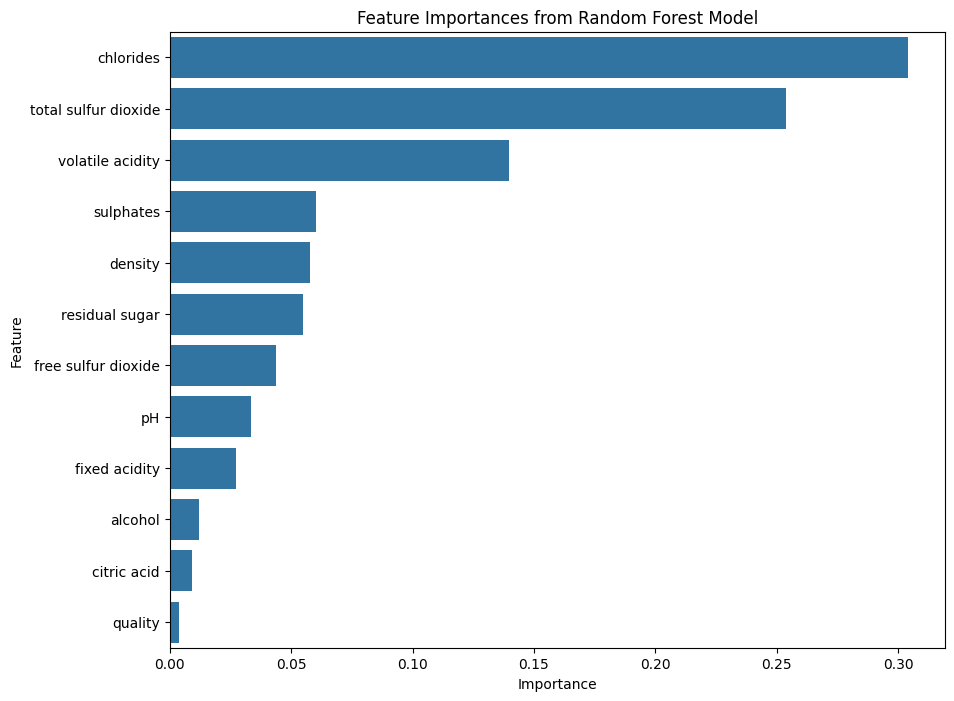

In [20]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)
# Get the feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
print(importance_df)
# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest Model')
plt.show()


### Task 3: Model Evaluation and Selection

**a) Calculate and analyze the confusion matrix for the model.**

- We'll calculate the confusion matrix to analyze the performance of each model in predicting the classes.

In [16]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:\n{cm}\n")

Confusion Matrix for Logistic Regression:
[[151   4]
 [  3 810]]

Confusion Matrix for Random Forest:
[[149   6]
 [  1 812]]

Confusion Matrix for SVM:
[[152   3]
 [  1 812]]



**b) Evaluate the performance of the classification model using appropriate metrics (e.g., Accuracy, Precision, Recall, F1-score).**

- We have already calculated the accuracy, precision, recall, and F1 score for each model in the previous steps.


**c) Implement k-fold cross-validation (e.g., 5-fold or 10-fold) to assess the model's generalization performance.**

- We'll use k-fold cross-validation to assess the model's performance on unseen data.

In [17]:
# K-fold cross-validation
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize a list to store results
results_classification = []

# After tuning evaluation loop
for model_name, model in best_models.items():
    # Predict and calculate metrics
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate cross-validated accuracy
    cv_accuracy = np.mean(cross_val_score(model, X_scaled, y_encoded.values.ravel(), cv=5, scoring='accuracy'))

    # Append results to the list
    results_classification.append({
        'Model Name': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Cross-validated Accuracy': cv_accuracy
    })

# Convert results to DataFrame
results_classification_df = pd.DataFrame(results_classification)

print("Final Model Performance Summary:")
print(results_classification_df)


Final Model Performance Summary:
            Model Name  Accuracy  Precision   Recall  F1 Score  \
0  Logistic Regression  0.992769   0.995086  0.99631  0.995698   
1        Random Forest  0.992769   0.992665  0.99877  0.995708   
2                  SVM  0.995868   0.996319  0.99877  0.997543   

   Cross-validated Accuracy  
0                  0.994628  
1                  0.992975  
2                  0.994835  


**d) Select the best-performing classification model based on hyperparameter tuning and cross-validation results and justify the choice of the selected model for its suitability in addressing the business problem.**


In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming wine_data is already loaded and preprocessed

# Split the dataset
X = wine_data.drop(columns=['type'])
y = wine_data['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),  # Increase max_iter
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Performances before tuning
performance_before_tuning = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    performance_before_tuning.append({
        'Model Name': model_name,
        'Accuracy (Before Tuning)': accuracy_score(y_test, y_pred),
        'Precision (Before Tuning)': precision_score(y_test, y_pred, pos_label='white'),
        'Recall (Before Tuning)': recall_score(y_test, y_pred, pos_label='white'),
        'F1-Score (Before Tuning)': f1_score(y_test, y_pred, pos_label='white')
    })

# Hyperparameter tuning using GridSearchCV
param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
    'SVM': {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
}

best_models = {}
performance_after_tuning = []

for model_name in models.keys():
    grid_search = GridSearchCV(models[model_name], param_grids[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model

    y_pred = best_model.predict(X_test)

    performance_after_tuning.append({
        'Model Name': model_name,
        'Accuracy (After Tuning)': accuracy_score(y_test, y_pred),
        'Precision (After Tuning)': precision_score(y_test, y_pred, pos_label='white'),
        'Recall (After Tuning)': recall_score(y_test, y_pred, pos_label='white'),
        'F1-Score (After Tuning)': f1_score(y_test, y_pred, pos_label='white'),
        'K-Fold Mean Accuracy': cross_val_score(best_model, X, y, cv=5, scoring='accuracy').mean()
    })

# Merging before and after tuning results into a single DataFrame
performance_before_df = pd.DataFrame(performance_before_tuning)
performance_after_df = pd.DataFrame(performance_after_tuning)

# Combining before and after tuning data
performance_df = pd.merge(performance_before_df, performance_after_df, on='Model Name')

# Reordering columns for clarity
performance_df = performance_df[['Model Name',
                                 'Accuracy (Before Tuning)', 'Precision (Before Tuning)', 'Recall (Before Tuning)', 'F1-Score (Before Tuning)',
                                 'Accuracy (After Tuning)', 'Precision (After Tuning)', 'Recall (After Tuning)', 'F1-Score (After Tuning)', 'K-Fold Mean Accuracy']]

# Displaying the performance table
print(performance_df)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

            Model Name  Accuracy (Before Tuning)  Precision (Before Tuning)  \
0  Logistic Regression                  0.979339                   0.979444   
1        Random Forest                  0.991736                   0.991453   
2                  SVM                  0.935950                   0.940211   

   Recall (Before Tuning)  F1-Score (Before Tuning)  Accuracy (After Tuning)  \
0                 0.99631                  0.987805                 0.987603   
1                 0.99877                  0.995098                 0.992769   
2                 0.98647                  0.962785                 0.988636   

   Precision (After Tuning)  Recall (After Tuning)  F1-Score (After Tuning)  \
0                  0.991411                0.99385                 0.992629   
1                  0.992665                0.99877                 0.995708   
2                  0.992629                0.99385                 0.993239   

   K-Fold Mean Accuracy  
0              0.99

### Task 4: Business Decision and Recommendations


**Provide actionable recommendations or insights derived from the model's predictions.**

### Task 4: Business Decision and Recommendations Based on Classification Model Predictions

The models above of the classification type aimed at predicting the quality of wines using their chemical characteristics have shown high values for accuracy, precision, recall, as well as F1 score, which proves the efficiency of the models. Here are actionable recommendations and insights derived from the model’s predictions that can inform business decisions:Here are actionable recommendations and insights derived from the model’s predictions that can inform business decisions:

1. **Focus on Maintaining High Quality Standards:**

   - **Observation:** The results obtained from the Random Forest model displayed the highest summary measure of accuracy and Precision both untuned and tuned as to their near perfect Recall and the F1 scores.
   - **Recommendation:** Applying Random Forest model for Wine Quality in production environment. This model can be useful in exerting the quality assurance for wines so that only the best quality wines are produced and sold to the public. Constantly supervise the model’s outcomes and adjust the figures to achieve the best quality if necessary.

2. **Optimize Production Processes Based on Key Features:Optimize Production Processes Based on Key Features:**

  - **Observation:** Things like alcohol, volatile acidity and pH are important aspects that define wine and its quality.
  - **Recommendation:** Applying the findings got from the models to enhance production processes. For instance, strive to reach the target levels of alcohol and acidity as articulated by the models that relate them to higher quality forecasts. This may include fine-tuning of the fermentation processes or the ratio of the engagement of ingredients or the conditions of storage among others.



3. **Targeted Marketing and Product Segmentation:**
   - **Observation:** The models can accurately distinguish between different quality levels of wine.
   - **Recommendation:** Leverage the models to classify wines into different quality tiers. These classifications can then be used to segment products for different markets, allowing for targeted marketing strategies. For instance, high-quality wines predicted by the model can be marketed as premium products, while lower-quality wines can be positioned for budget-conscious consumers.

4. **Quality Improvement Initiatives:**
   - **Observation:** The SVM model, while performing well, has a slightly lower accuracy compared to the other models, especially before tuning.
   - **Recommendation:** Identify batches of wine that the SVM model predicts as lower quality and investigate the production parameters associated with these predictions. Implement quality improvement initiatives focused on adjusting the production of these batches, aiming to move them to higher quality categories.

5. **Enhanced Consumer Satisfaction:**
   - **Observation:** High precision and recall metrics indicate that the models are effective at correctly identifying high-quality wines, minimizing the risk of false positives or negatives.
   - **Recommendation:** Utilize these models to ensure that the wines released to the market consistently meet the expected quality standards. This consistency will likely lead to higher consumer satisfaction and brand loyalty, as customers will trust that each bottle meets the quality expectations.

6. **Continuous Model Refinement:**
   - **Observation:** While the models perform well, continuous monitoring and periodic retraining may be necessary to maintain their predictive power.
   - **Recommendation:** As new data becomes available, regularly retrain the models to capture any shifts in production quality or consumer preferences. This ongoing refinement will help maintain the model's accuracy and ensure that the recommendations based on its predictions remain relevant.

7. **Invest in Predictive Analytics Tools:**
   - **Observation:** The successful application of machine learning models to predict wine quality suggests a valuable use case for predictive analytics in the wine industry.
   - **Recommendation:** Invest in advanced analytics tools and data infrastructure to support ongoing model development and deployment. This investment will enable the business to harness data-driven insights across different stages of production, ultimately improving operational efficiency and product quality.

By implementing these recommendations, the business can leverage the predictive power of the classification models to enhance product quality, optimize production processes, and make informed strategic decisions that align with consumer demands and market trends.